In [82]:
import pandas as pd
import pickle

In [83]:
df = pd.read_pickle("objects_saved/data.pkl")
df.head()

,Country (according to CN Gov):,Date of research inquiry,HF Index of Economic Freedom (Scale: 1-100),Heritage Foundation Index of Economic Freedom (Global Ranking),Bertelsmann Transformation index (BTI),Bertelsmann Transformation index (BTI) - Ranking,IMF WB Customs and other import duties (% of tax revenue) 2016,WB IMF Non-performing loans to total gross loans ratio (%),Moody's Socvereign Ratings List,S&P Sovereign Ratings List,...,BRI Percentage of Urban Population in Total Population,WB Cost of Starting a Business,WB Ease of Doing Business Index (1 = most business-friendly regulations),WB Logistics Performance Index (LPI) (range: 1-5),IFDI Net Inflows (% of GDP),ED National Electric Power Consumption TwH,"WHO Current Health Expenditure p.c., PPP USD",WB Research Expenditure % of GDP,WIPO Trademark applications,WIPO Patent Applications
1,Afghanistan,NaT,51.5,152.0,2.954762,121.0,35.203141,12.201830,NaN,NaN,...,26.703,0.0,NaN,NaN,0.718898,NaN,162.781158,NaN,NaN,NaN
2,Albania,NaT,66.5,52.0,6.828571,30.0,2.216459,13.232533,8,7,...,57.407,0.0,NaN,NaN,8.015508,NaN,759.666984,NaN,1232.0,14.0
3,Armenia,NaT,67.7,47.0,5.576190,61.0,6.275395,5.432318,9,NaN,...,62.673,0.0,NaN,NaN,2.044111,NaN,876.856857,NaN,2685.0,107.0
4,Azerbaijan,NaT,65.4,60.0,4.127381,100.0,7.571847,NaN,12,12,...,54.62,0.0,NaN,NaN,2.988948,NaN,1193.058830,NaN,2817.0,144.0
5,Bahrain,NaT,66.4,54.0,4.616667,89.0,27.386091,NaN,NaN,12,...,88.775,2.9,NaN,NaN,4.014072,NaN,1866.297320,NaN,253.0,8.0


In [84]:
with open('objects_saved/isocodes.pkl', 'rb') as handle:
  isocodes = pickle.load(handle)

In [85]:
df_modeling = df[['Country (according to CN Gov):',
       'HF Index of Economic Freedom (Scale: 1-100)',
       'Bertelsmann Transformation index (BTI)',
       'WB UNESCO R&D Expenditure % of GDP',
       'WB UNESCO Researchers p. mn inhabitants',
       'TI Corruption Perception Index',
        'BRI GDP p.c.']]

In [86]:
df_modeling = df_modeling.dropna()
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.01680558488
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.7476902684
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.80730449044
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.86910816324
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.69


In [87]:
df_modeling['BRI GDP p.c.'] = df_modeling['BRI GDP p.c.'].apply(float)

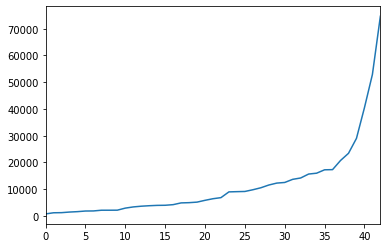

In [88]:
%matplotlib inline
df_modeling['BRI GDP p.c.'].sort_values().plot(use_index=False)

In [89]:
df_modeling['GDP'] = pd.cut(x=df_modeling['BRI GDP p.c.'].sort_values(), 
                            bins=[0,5000,20000,max(df_modeling['BRI GDP p.c.'])], 
                            labels=["Low","Medium","High"], right=True)

In [90]:
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.,GDP
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.016806,Low
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.747690,High
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.807304,Low
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.869108,Medium
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.689904,Low


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_modeling['HF_scaled'] = scaler.fit_transform(df_modeling[['HF Index of Economic Freedom (Scale: 1-100)']])
df_modeling['BTI_scaled'] = scaler.fit_transform(df_modeling[['Bertelsmann Transformation index (BTI)']])
df_modeling['WB_R&D_scaled'] = scaler.fit_transform(df_modeling[['WB UNESCO R&D Expenditure % of GDP']])
df_modeling['WB_research_scaled'] = scaler.fit_transform(df_modeling[['WB UNESCO Researchers p. mn inhabitants']])
df_modeling['TI_scaled'] = scaler.fit_transform(df_modeling[['TI Corruption Perception Index']])
df_modeling['BRI_scaled'] = scaler.fit_transform(df_modeling[['BRI GDP p.c.']])

In [92]:
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.,GDP,HF_scaled,BTI_scaled,WB_R&D_scaled,WB_research_scaled,TI_scaled,BRI_scaled
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.016806,Low,0.263836,0.288056,-0.905864,-0.869097,-0.570675,-0.526085
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.747690,High,0.251314,-1.011212,-1.006223,-0.719452,-0.570675,0.829981
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.807304,Low,-0.312177,-0.032915,-0.819850,-0.652649,-0.425043,-0.509839
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.869108,Medium,0.576887,0.858671,0.262729,0.519359,-0.133778,-0.326845
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.689904,Low,-0.712882,-1.373441,-0.973876,-0.957509,-1.662917,-0.721938


In [93]:
df_export = df_modeling[['HF_scaled', 'BTI_scaled', 'WB_R&D_scaled', 'WB_research_scaled', 'TI_scaled', 'BRI_scaled', 'GDP']]
df_export.head()

,HF_scaled,BTI_scaled,WB_R&D_scaled,WB_research_scaled,TI_scaled,BRI_scaled,GDP
2,0.263836,0.288056,-0.905864,-0.869097,-0.570675,-0.526085,Low
5,0.251314,-1.011212,-1.006223,-0.719452,-0.570675,0.829981,High
9,-0.312177,-0.032915,-0.819850,-0.652649,-0.425043,-0.509839,Low
11,0.576887,0.858671,0.262729,0.519359,-0.133778,-0.326845,Medium
12,-0.712882,-1.373441,-0.973876,-0.957509,-1.662917,-0.721938,Low


In [94]:
df_export.to_csv("data_files/countries_analysis.csv")

In [95]:
df_modeling.to_pickle("objects_saved/data_modeling.pkl")

In [96]:
df_export.to_pickle("objects_saved/data_export.pkl")

# Analysis with Random Forest model

In [97]:
import numpy as np

## Preparing training data

In [98]:
df_export['is_training'] = np.random.uniform(0, 1, len(df_export)) <= .75
df_export['is_training']

/home/aitian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2      True
5      True
9      True
11     True
12    False
14    False
15     True
17     True
18     True
20     True
22    False
23     True
24    False
28     True
29    False
30     True
32     True
33    False
35     True
36     True
37    False
39    False
41    False
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
52    False
53     True
54     True
55     True
56    False
59     True
60     True
61     True
65     True
66     True
67    False
Name: is_training, dtype: bool

In [99]:
training, testing = df_export[df_export['is_training']==True], df_export[df_export['is_training']==False]
training

,HF_scaled,BTI_scaled,WB_R&D_scaled,WB_research_scaled,TI_scaled,BRI_scaled,GDP,is_training
2,0.263836,0.288056,-0.905864,-0.869097,-0.570675,-0.526085,Low,True
5,0.251314,-1.011212,-1.006223,-0.719452,-0.570675,0.829981,High,True
9,-0.312177,-0.032915,-0.819850,-0.652649,-0.425043,-0.509839,Low,True
11,0.576887,0.858671,0.262729,0.519359,-0.133778,-0.326845,Medium,True
15,1.165422,1.869835,2.198590,1.615929,1.104096,0.399765,Medium,True
17,-1.489247,-1.209809,-0.049644,-0.508144,-0.643491,-0.550530,Low,True
18,1.528561,1.867737,1.309169,1.530858,2.123521,0.404237,Medium,True
20,1.440906,0.046803,-0.649223,-0.036768,1.031279,-0.537882,Low,True
23,-1.151153,0.365676,-0.023171,-0.826847,-0.206595,-0.692424,Low,True
28,0.263836,-0.657375,0.162199,-0.556174,0.375934,-0.458038,Low,True


In [100]:
features = df_export.columns[0:5]
features

Index(['HF_scaled', 'BTI_scaled', 'WB_R&D_scaled', 'WB_research_scaled',
       'TI_scaled'],
      dtype='object')

In [101]:
y_training = np.array(training['GDP'])
y_training

array(['Low', 'High', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'High', 'Low', 'Medium', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'Medium', 'High', 'Medium', 'Medium',
       'High', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Low', 'Low'],
      dtype=object)

## Training the algorithm

In [103]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(training[features], y_training)

y_predict = rfc.predict(testing[features])
y_true = testing['GDP']

/home/aitian/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Evaluating the algorithm

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predict))

              precision    recall  f1-score   support

         Low       0.71      1.00      0.83         5
      Medium       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

